## Reto Restaurantes Colombianos


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

tf.__version__

'2.4.1'

### Los datos

[kaggle: twitter-airline-sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv)

In [7]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

#ruta = 'gdrive/My Drive/Colab Notebooks/Sentimientos'


Mounted at /content/gdrive


In [26]:
#df= pd.read_csv(ruta + '/restaurant_reviews_clean.csv')
df= pd.read_csv('restaurant_reviews_clean.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios
0,0,0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...
1,1,1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...
2,2,2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...
3,3,3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...
4,4,4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...


In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [16]:
#!pip install google_trans_new
#from googletrans import Translator
#from google_trans_new import google_translator  

In [17]:
#translator = google_translator() 
#df['reviews_limpios'] = df['reviews_limpios'].astype(str)
#df1 = df['reviews_limpios'][:1000]
#df_reviews['reviews_traducidas'] = df1.apply(translator.translate,  dest='en').apply(getattr, args=('text',))


In [67]:
#for j in range(len(df['reviews_limpios'][:20])):
 #   df['reviews_traducidas'][j] = translator.translate(df['reviews_limpios'][j], lang_src='es', lang_tgt='en')

In [29]:
df.head(1700)

,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios
0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...
1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...
2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...
3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...
4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...
...,...,...,...,...,...,...,...
1695,Karen's Pizza,"buena experiencia, pero mejores restaurantes e...",26 de agosto de 2014,30,Comí aquí con un amigo mío y yo apreciamos los...,"Italiana, Pizzería",comí aquí amigo apreciamos sabores únicos pizz...
1696,Karen's Pizza,"Muy buena pizza, pero ...",22 de julio de 2014,40,"A sólo 2 minutos a pie del hotel, encontramos ...","Italiana, Pizzería",sólo minutos hotel encontramos pizza bueno cara
1697,Karen's Pizza,Es como una broma,14 de julio de 2014,10,Todo lo que podía salir mal salió mal aquí. Lo...,"Italiana, Pizzería",podía salir salió aquí años incapaces manejar ...
1698,Karen's Pizza,aclamadísimo musical mal servicio y comida,13 de julio de 2014,10,Hay unos 35 polo completamente idea'ed adolesc...,"Italiana, Pizzería",polo completamente idea'ed adolescentes corrie...


In [32]:
def polarity_to_label(x):
    if(x <= 20):
        return 'negative'
    if(x == 30):
        return 'neutral'
    if(x >= 40):
        return 'positive'
df['etiquetas'] = df.Rating.apply(polarity_to_label)

### Análisis descriptivos

In [33]:
df = df[df['etiquetas'] != 'neutral']
df.head(10)
# convert airline_seentiment to numeric


,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios,etiquetas
0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...,positive
1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...,positive
2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...,positive
3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...,positive
4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...,positive
5,Casa Vieja Restaurante,Luego de 40 años mejor aún!,12 de marzo de 2016,50,"Luego de visitarlo hace 40 años, me consigo un...","Colombiana, Sudamericana",luego visitarlo hace años consigo restaurante ...,positive
6,Casa Vieja Restaurante,Comida típica Colombiana,25 de febrero de 2016,40,"El entorno es muy agradable, desde la decoraci...","Colombiana, Sudamericana",entorno agradable decoración música servicio p...,positive
7,Casa Vieja Restaurante,Recomendable 100% en Bogotá.,16 de septiembre de 2015,50,Exquisita calidad en los platos típicos colomb...,"Colombiana, Sudamericana",exquisita calidad platos típicos colombianos z...,positive
8,Casa Vieja Restaurante,Muy buen Puchero y platos tipicos!!!,11 de septiembre de 2015,40,Regrese después de muchos años y de malas expe...,"Colombiana, Sudamericana",regrese después años malas experiencias ahora ...,positive
9,Casa Vieja Restaurante,Critica de un mexicano,19 de agosto de 2015,40,Estuve con unos amigos y esposa disfrutando es...,"Colombiana, Sudamericana",amigos esposa disfrutando lugar coincido denom...,positive


In [34]:
df.shape

(40206, 8)

In [35]:
sentiment_label = df.etiquetas.factorize() # convierte a factores numéricos
print(sentiment_label)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), Index(['positive', 'negative'], dtype='object'))


## Modelo Predictivo: polaridad

### Preprocesamiento de textos

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [92]:

df['reviews_limpios'] = df['reviews_limpios'].astype(str)


In [93]:
review = df.reviews_limpios.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [94]:
print(review.shape)

(40206,)


In [95]:
print(review[1])
print(encoded_docs[1])

restaurante agradable antiguo familiar personal agradó bastante servicio bueno comida típica colombiana bien lograda clásico tour gastronómico bogotá recomendado
[9, 12, 1802, 230, 47, 4107, 57, 5, 18, 1, 248, 153, 11, 2350, 616, 2482, 1663, 21, 16]


In [96]:
print(padded_sequence[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    9
   12 1802  230   47 4107   57    5   18    1  248  153   11 2350  616
 2482 

### El Modelo keras

In [102]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(30, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           886304    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 893,895
Trainable params: 893,895
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='../Imagenes/model.png')

In [103]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=1, batch_size=32)

1006/1006 [==============================] - 674s 668ms/step - loss: 0.2689 - accuracy: 0.9131 - val_loss: 0.0792 - val_accuracy: 0.9725


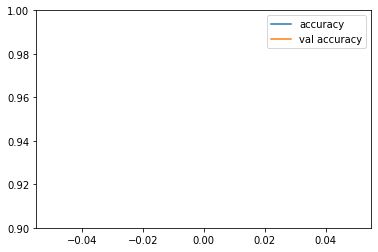

In [113]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.ylim([0.9,1.0])
plt.legend()
plt.show()

In [106]:
history.history

{'accuracy': [0.9384715557098389],
 'loss': [0.1770823448896408],
 'val_accuracy': [0.9725192785263062],
 'val_loss': [0.07916438579559326]}

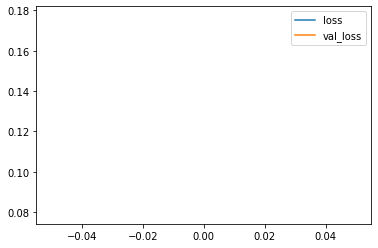

In [107]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [116]:
test_rev = []
test_rev.append(df['reviews_limpios'][20])
tw = tokenizer.texts_to_sequences(test_rev)
tw = pad_sequences(tw,maxlen=200)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [117]:
prediction = model.predict(tw)
prediction

array([[0.00768345]], dtype=float32)